# Training Strategies

## 1) Import all necessary packages and load the data

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU, Dropout
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.callbacks import EarlyStopping

/Users/tom_g/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tom_g/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tom_g/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tom_g/opt/anaconda3/envs/dl/lib/python3

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Let us check the dimensions of x_train
x_train.shape # 60000 images with 28*28 pixels

(60000, 28, 28)

In [8]:
# Let's look at the first image
x_train[0].flatten().shape

(784,)

In [11]:
# Convert our y to vectors
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [14]:
to_categorical(y_train)[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

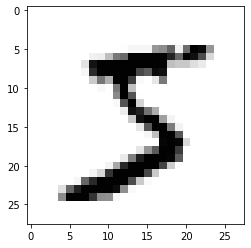

In [37]:
# plot the first image
plt.imshow(x_train[0], cmap=plt.cm.Greys)

## 2) Normalize input data

## 3) Set up the model

In [2]:
# Chose the model architecture; probably the most important hyperparameter
m = Sequential()
m.add(Flatten(input_shape=(28, 28)))
m.add(Dense(units=16, activation='relu'))# Hyperparameters: units = # neurons, activation, weight_initialization
m.add(Dropout(0.5))
# m.add(Dense())
# m.add(Dropout())
# How many output neurons do we need? --> 10 because we have 10 possible classes
m.add(Dense(units=10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Sigmoid functions as activation functions will make neural networks suffer severely from a problem called the **vanishing gradient** problem. In simple words, this problems describes the problem that gradients of early weights (an early weight is a weight in an early layer of the network) become very very small with sigmoid functions.

- The maximum value of the derivative of a sigmoid function is 0.5 and the value will be very low far very small or very large values. Multiplying together values <1 (in the context of backpropagation) will lead to neural networks that are not able to learn.

In [3]:
m.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy']
)

ValueError: The model cannot be compiled because it has no loss to optimize.

In [34]:
m.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                12560     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Create the early stopping callback
stopping = EarlyStopping(min_delta=0.02, patience=2)
# min_delta = the maximum change in val_loss that is considered not being a change
# patience = the number of epochs that the val_loss has to be constant

In [36]:
# Fit our model
history = m.fit(x_train, to_categorical(y_train), epochs=4, validation_split=0.2,
               callbacks=[stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/4
48000/48000 [==============================] - 2s 39us/sample - loss: 3.1332 - acc: 0.1151 - val_loss: 2.2114 - val_acc: 0.1593
Epoch 2/4
48000/48000 [==============================] - 2s 37us/sample - loss: 2.2198 - acc: 0.1454 - val_loss: 2.1203 - val_acc: 0.2004
Epoch 3/4
48000/48000 [==============================] - 2s 32us/sample - loss: 2.1879 - acc: 0.1587 - val_loss: 2.0297 - val_acc: 0.2212
Epoch 4/4
48000/48000 [==============================] - 2s 32us/sample - loss: 2.1411 - acc: 0.1777 - val_loss: 2.0266 - val_acc: 0.2224


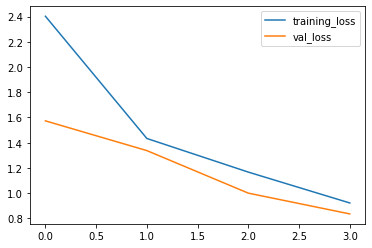

In [30]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()